Air Quality Index (AQI) Exploratory Data Analysis
Karachi, Pakistan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

df = pd.read_csv('aqi_data.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

print(f"Loaded {len(df):,} records")
print(f"Date Range: {df['timestamp'].min()} to {df['timestamp'].max()}")
print(f"Duration: {(df['timestamp'].max() - df['timestamp'].min()).days} days")

Loaded 5,808 records
Date Range: 2025-09-05 00:00:00+00:00 to 2026-01-16 23:00:00+00:00
Duration: 133 days


In [4]:
print("Dataset Overview")
print("-" * 80)
print(f"\nShape: {df.shape[0]:,} rows x {df.shape[1]} columns\n")

print("Statistical Summary:")
display(df[['aqi', 'pm10', 'pm2_5', 'temperature', 'humidity', 'wind_speed']].describe())

print("\nMissing Values:")
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values")

Dataset Overview
--------------------------------------------------------------------------------

Shape: 5,808 rows x 15 columns

Statistical Summary:


,aqi,pm10,pm2_5,temperature,humidity,wind_speed
count,5808.000000,5808.000000,5808.000000,5808.000000,5808.000000,5808.000000
mean,98.647864,47.686777,34.958953,24.900293,54.922865,8.841219
std,31.057330,26.262569,15.443252,4.883023,23.178144,3.822900
min,29.166667,7.600000,7.000000,11.200000,7.000000,0.500000
25%,75.536481,31.700000,24.000000,21.100000,35.000000,6.300000
50%,93.133047,42.350000,32.200000,25.500000,54.000000,8.500000
75%,120.100503,58.100000,43.500000,28.000000,76.000000,11.000000
max,171.548999,262.600000,96.400000,40.200000,99.000000,22.800000



Missing Values:
No missing values


AQI Statistics
--------------------------------------------------------------------------------
Mean: 98.65
Median: 93.13
Std Dev: 31.06
Range: 29.17 - 171.55

Category Distribution:
Moderate: 3,195 (55.0%)
Unhealthy for Sensitive: 1,871 (32.2%)
Unhealthy: 586 (10.1%)
Good: 156 (2.7%)


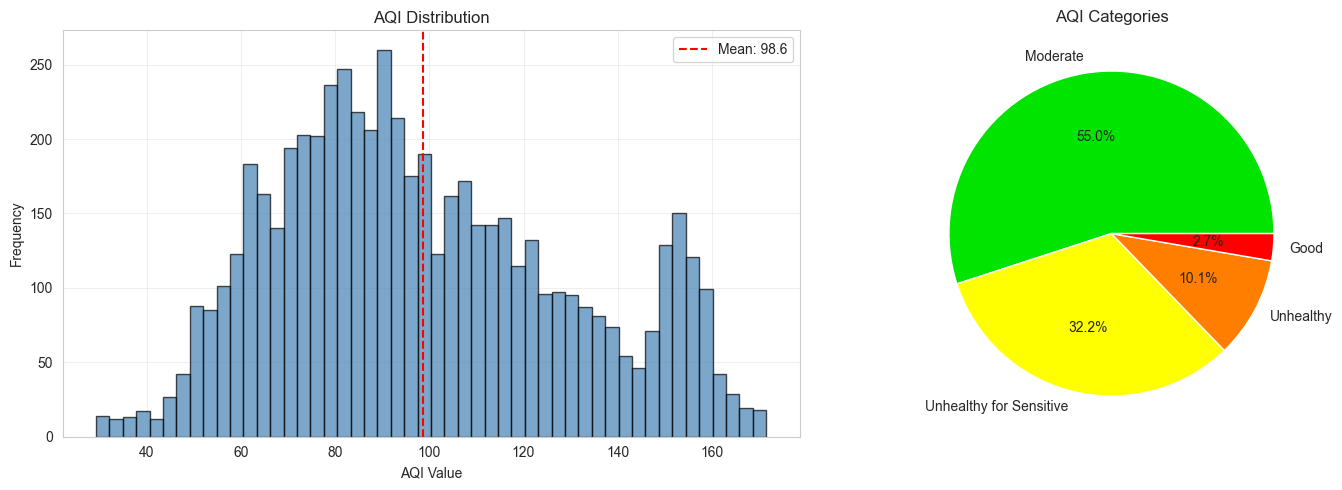

In [5]:
def get_aqi_category(aqi):
    if aqi <= 50: return "Good"
    elif aqi <= 100: return "Moderate"
    elif aqi <= 150: return "Unhealthy for Sensitive"
    elif aqi <= 200: return "Unhealthy"
    elif aqi <= 300: return "Very Unhealthy"
    else: return "Hazardous"

df['aqi_category'] = df['aqi'].apply(get_aqi_category)

print("AQI Statistics")
print("-" * 80)
print(f"Mean: {df['aqi'].mean():.2f}")
print(f"Median: {df['aqi'].median():.2f}")
print(f"Std Dev: {df['aqi'].std():.2f}")
print(f"Range: {df['aqi'].min():.2f} - {df['aqi'].max():.2f}\n")

print("Category Distribution:")
category_counts = df['aqi_category'].value_counts()
for category, count in category_counts.items():
    print(f"{category}: {count:,} ({count/len(df)*100:.1f}%)")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(df['aqi'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(df['aqi'].mean(), color='red', linestyle='--', 
                label=f'Mean: {df["aqi"].mean():.1f}')
axes[0].set_xlabel('AQI Value')
axes[0].set_ylabel('Frequency')
axes[0].set_title('AQI Distribution')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

colors = ['#00E400', '#FFFF00', '#FF7E00', '#FF0000', '#8F3F97', '#7E0023']
category_counts.plot(kind='pie', autopct='%1.1f%%', 
                     colors=colors[:len(category_counts)], ax=axes[1])
axes[1].set_ylabel('')
axes[1].set_title('AQI Categories')

plt.tight_layout()
plt.savefig('aqi_overview.png', dpi=300, bbox_inches='tight')
plt.show()

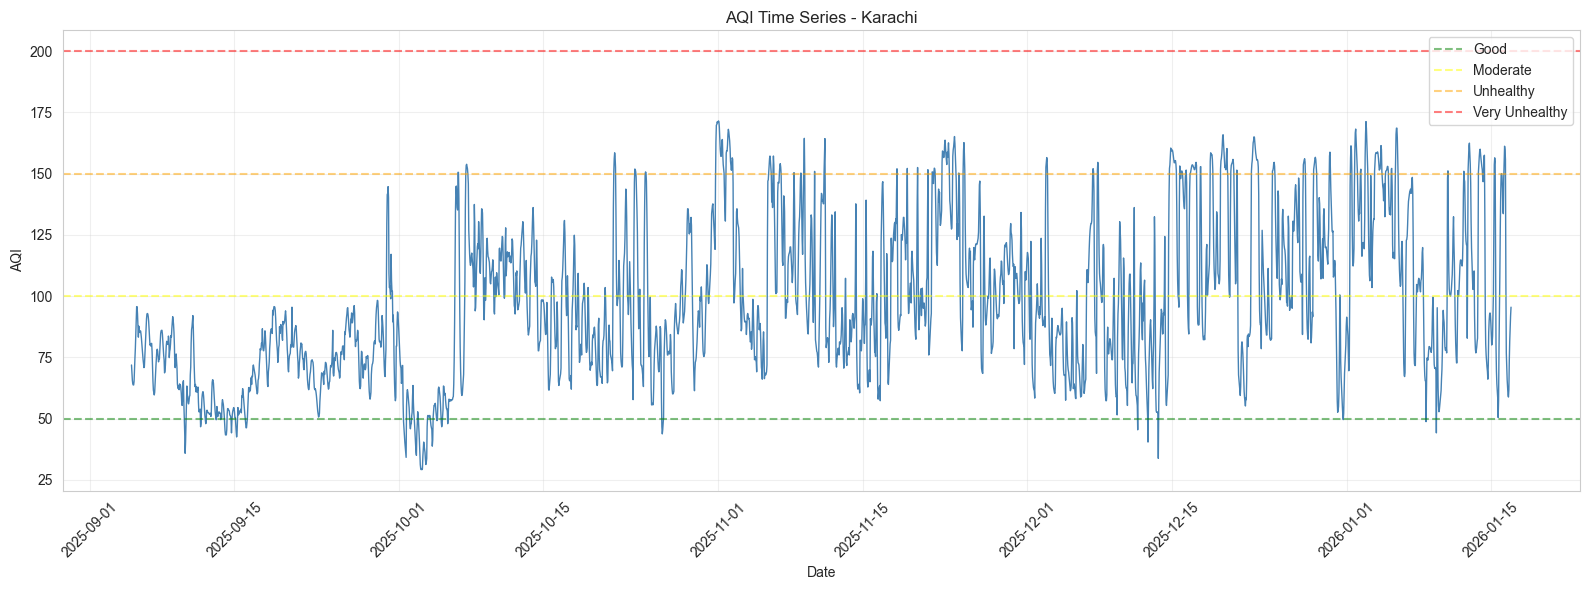

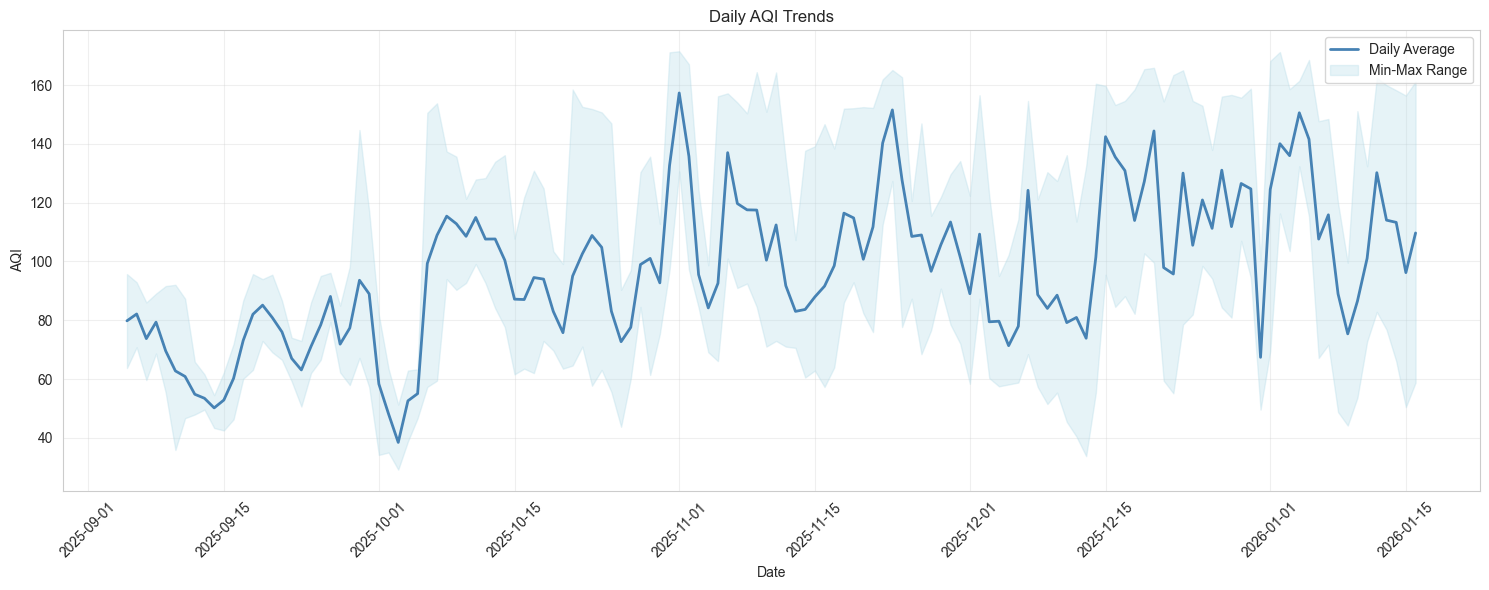

In [6]:
plt.figure(figsize=(16, 6))
plt.plot(df['timestamp'], df['aqi'], linewidth=1, color='steelblue')

# Add category lines
plt.axhline(y=50, color='green', linestyle='--', alpha=0.5, label='Good')
plt.axhline(y=100, color='yellow', linestyle='--', alpha=0.5, label='Moderate')
plt.axhline(y=150, color='orange', linestyle='--', alpha=0.5, label='Unhealthy')
plt.axhline(y=200, color='red', linestyle='--', alpha=0.5, label='Very Unhealthy')

plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('AQI Time Series - Karachi')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('aqi_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

# Daily trends
df['date'] = pd.to_datetime(df['timestamp']).dt.date
daily = df.groupby('date')['aqi'].agg(['mean', 'min', 'max']).reset_index()

plt.figure(figsize=(15, 6))
plt.plot(daily['date'], daily['mean'], linewidth=2, label='Daily Average', color='steelblue')
plt.fill_between(daily['date'], daily['min'], daily['max'], 
                 alpha=0.3, color='lightblue', label='Min-Max Range')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Daily AQI Trends')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('daily_trends.png', dpi=300, bbox_inches='tight')
plt.show()

Temporal Patterns
--------------------------------------------------------------------------------
Peak Hour: 8:00 (AQI: 112.7)
Best Hour: 16:00 (AQI: 82.4)
Worst Day: Saturday (102.2)
Best Day: Wednesday (94.0)


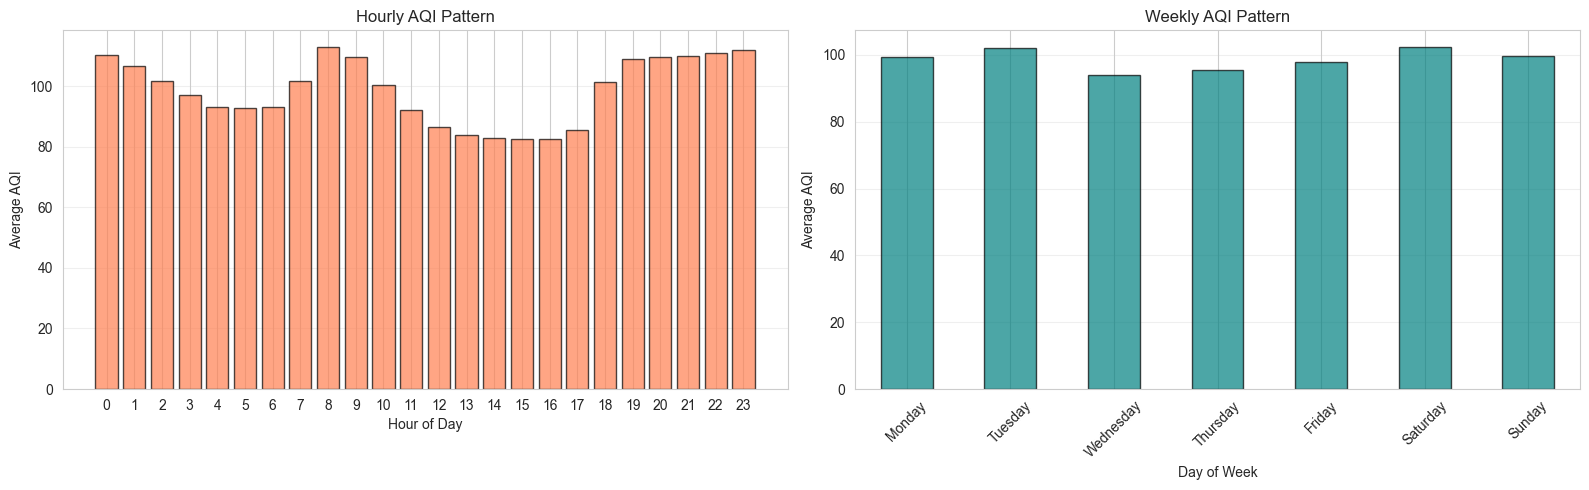

In [7]:
df['hour'] = pd.to_datetime(df['timestamp']).dt.hour
df['day_of_week'] = pd.to_datetime(df['timestamp']).dt.day_name()

hourly_avg = df.groupby('hour')['aqi'].mean()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_avg = df.groupby('day_of_week')['aqi'].mean().reindex(day_order)

print("Temporal Patterns")
print("-" * 80)
print(f"Peak Hour: {hourly_avg.idxmax()}:00 (AQI: {hourly_avg.max():.1f})")
print(f"Best Hour: {hourly_avg.idxmin()}:00 (AQI: {hourly_avg.min():.1f})")
print(f"Worst Day: {weekly_avg.idxmax()} ({weekly_avg.max():.1f})")
print(f"Best Day: {weekly_avg.idxmin()} ({weekly_avg.min():.1f})")

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

axes[0].bar(hourly_avg.index, hourly_avg.values, color='coral', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Average AQI')
axes[0].set_title('Hourly AQI Pattern')
axes[0].set_xticks(range(0, 24))
axes[0].grid(True, alpha=0.3, axis='y')

weekly_avg.plot(kind='bar', ax=axes[1], color='teal', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Average AQI')
axes[1].set_title('Weekly AQI Pattern')
axes[1].set_xticklabels(day_order, rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('temporal_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

Pollutant Statistics
--------------------------------------------------------------------------------
PM10: Mean=47.69, Max=262.60
PM2_5: Mean=34.96, Max=96.40
CO: Mean=790.01, Max=4515.00
NO2: Mean=30.22, Max=138.50
SO2: Mean=20.38, Max=65.40
OZONE: Mean=72.21, Max=195.00


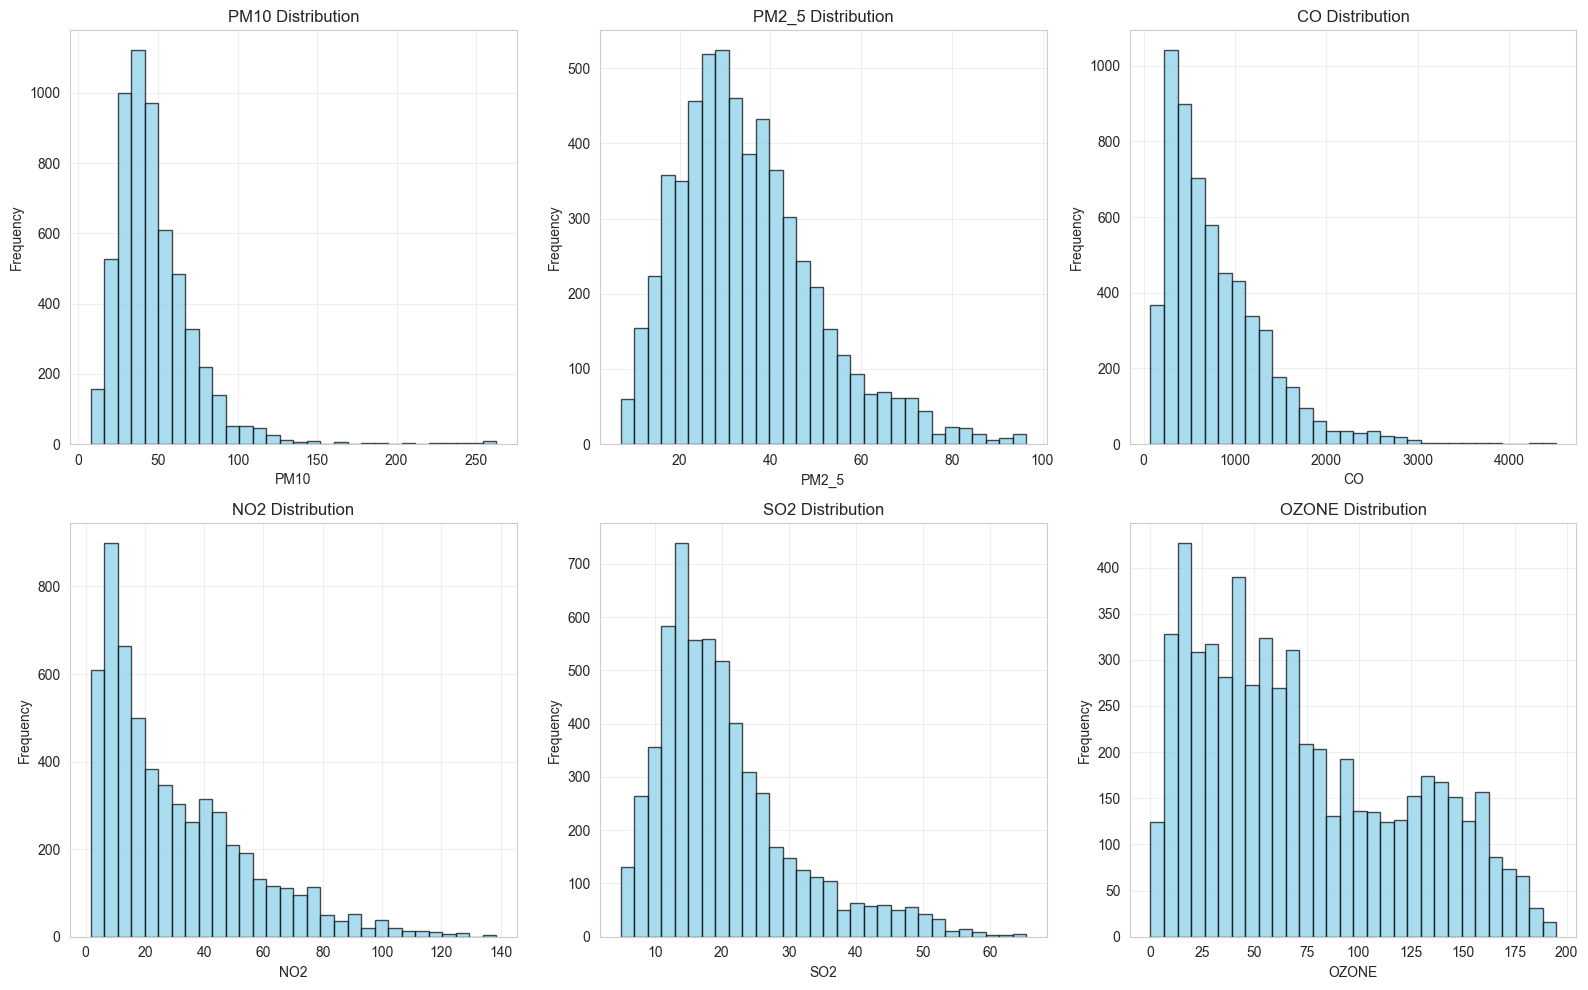

In [8]:
pollutants = ['pm10', 'pm2_5', 'co', 'no2', 'so2', 'ozone']

print("Pollutant Statistics")
print("-" * 80)
for p in pollutants:
    if p in df.columns:
        print(f"{p.upper()}: Mean={df[p].mean():.2f}, Max={df[p].max():.2f}")

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, pollutant in enumerate(pollutants):
    if pollutant in df.columns:
        axes[idx].hist(df[pollutant].dropna(), bins=30, 
                      color='skyblue', edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'{pollutant.upper()} Distribution')
        axes[idx].set_xlabel(f'{pollutant.upper()}')
        axes[idx].set_ylabel('Frequency')
        axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('pollutants.png', dpi=300, bbox_inches='tight')
plt.show()

Top Correlations with AQI
--------------------------------------------------------------------------------
pm2_5: 0.980
pm10: 0.612
no2: 0.590
co: 0.559
so2: 0.419
humidity: -0.075
ozone: -0.208
wind_speed: -0.330
temperature: -0.394


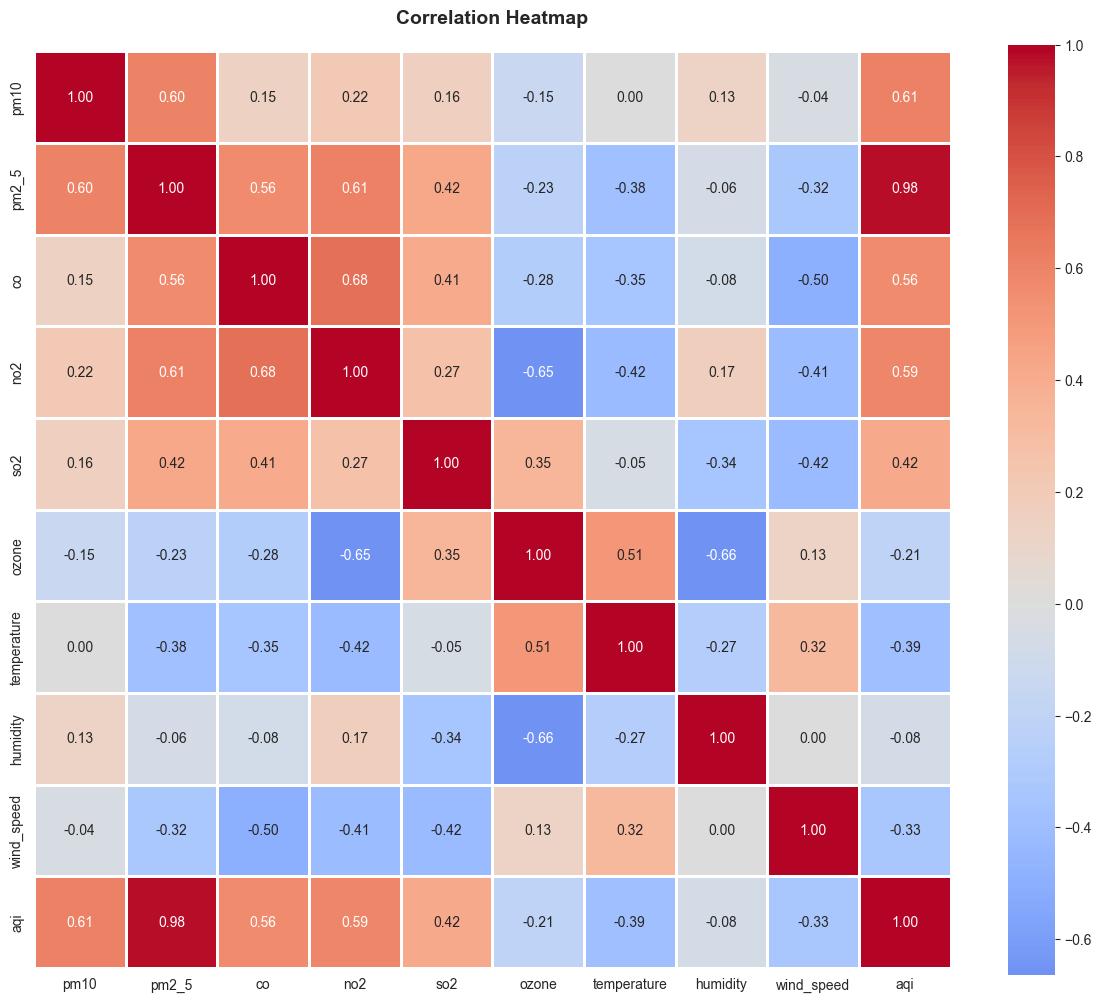

In [9]:
numeric_cols = ['pm10', 'pm2_5', 'co', 'no2', 'so2', 'ozone', 
                'temperature', 'humidity', 'wind_speed', 'aqi']
numeric_cols = [c for c in numeric_cols if c in df.columns]

corr_matrix = df[numeric_cols].corr()

print("Top Correlations with AQI")
print("-" * 80)
aqi_corr = corr_matrix['aqi'].sort_values(ascending=False)
for feature, corr in aqi_corr.items():
    if feature != 'aqi':
        print(f"{feature}: {corr:.3f}")

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Correlation Heatmap', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation.png', dpi=300, bbox_inches='tight')
plt.show()

Weather Impact
--------------------------------------------------------------------------------
Temperature correlation: -0.394
Humidity correlation: -0.075
Wind Speed correlation: -0.330


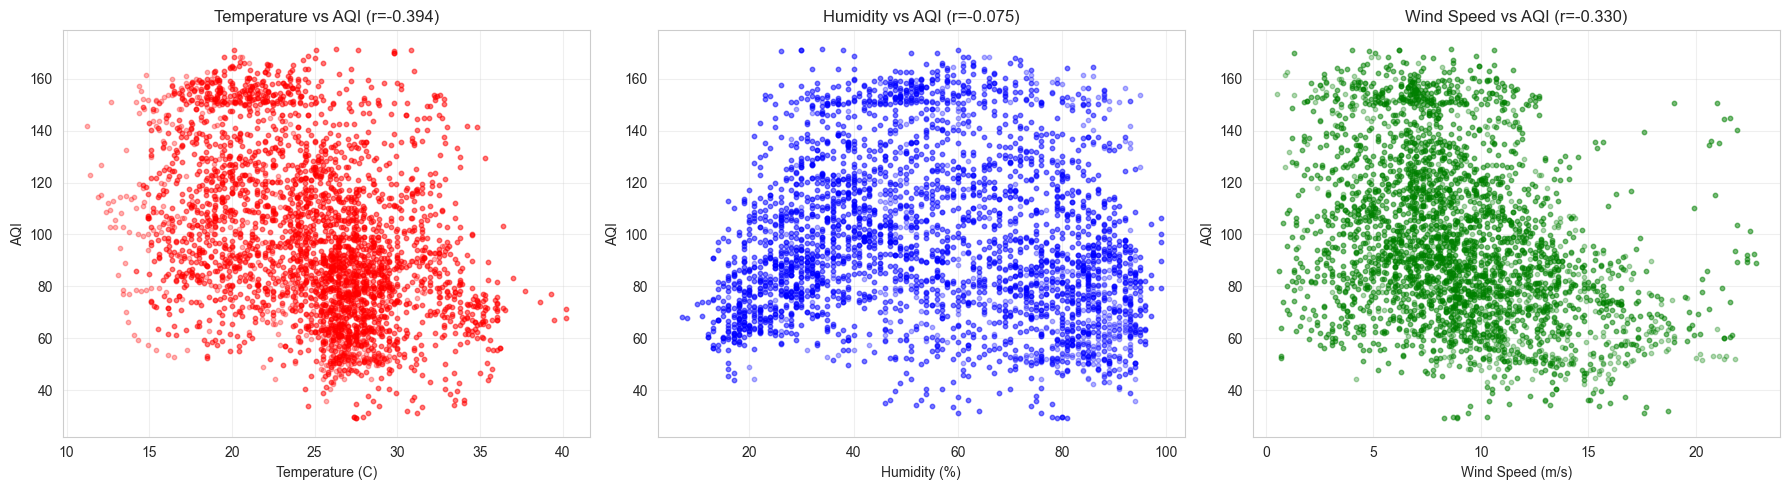

In [10]:
if all(col in df.columns for col in ['temperature', 'humidity', 'wind_speed']):
    temp_corr = df[['temperature', 'aqi']].corr().iloc[0, 1]
    humid_corr = df[['humidity', 'aqi']].corr().iloc[0, 1]
    wind_corr = df[['wind_speed', 'aqi']].corr().iloc[0, 1]
    
    print("Weather Impact")
    print("-" * 80)
    print(f"Temperature correlation: {temp_corr:.3f}")
    print(f"Humidity correlation: {humid_corr:.3f}")
    print(f"Wind Speed correlation: {wind_corr:.3f}")

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    axes[0].scatter(df['temperature'], df['aqi'], alpha=0.3, s=10, color='red')
    axes[0].set_xlabel('Temperature (C)')
    axes[0].set_ylabel('AQI')
    axes[0].set_title(f'Temperature vs AQI (r={temp_corr:.3f})')
    axes[0].grid(True, alpha=0.3)
    
    axes[1].scatter(df['humidity'], df['aqi'], alpha=0.3, s=10, color='blue')
    axes[1].set_xlabel('Humidity (%)')
    axes[1].set_ylabel('AQI')
    axes[1].set_title(f'Humidity vs AQI (r={humid_corr:.3f})')
    axes[1].grid(True, alpha=0.3)
    
    axes[2].scatter(df['wind_speed'], df['aqi'], alpha=0.3, s=10, color='green')
    axes[2].set_xlabel('Wind Speed (m/s)')
    axes[2].set_ylabel('AQI')
    axes[2].set_title(f'Wind Speed vs AQI (r={wind_corr:.3f})')
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('weather_impact.png', dpi=300, bbox_inches='tight')
    plt.show()

Particulate Matter Analysis
--------------------------------------------------------------------------------
PM2.5 vs PM10 correlation: 0.602


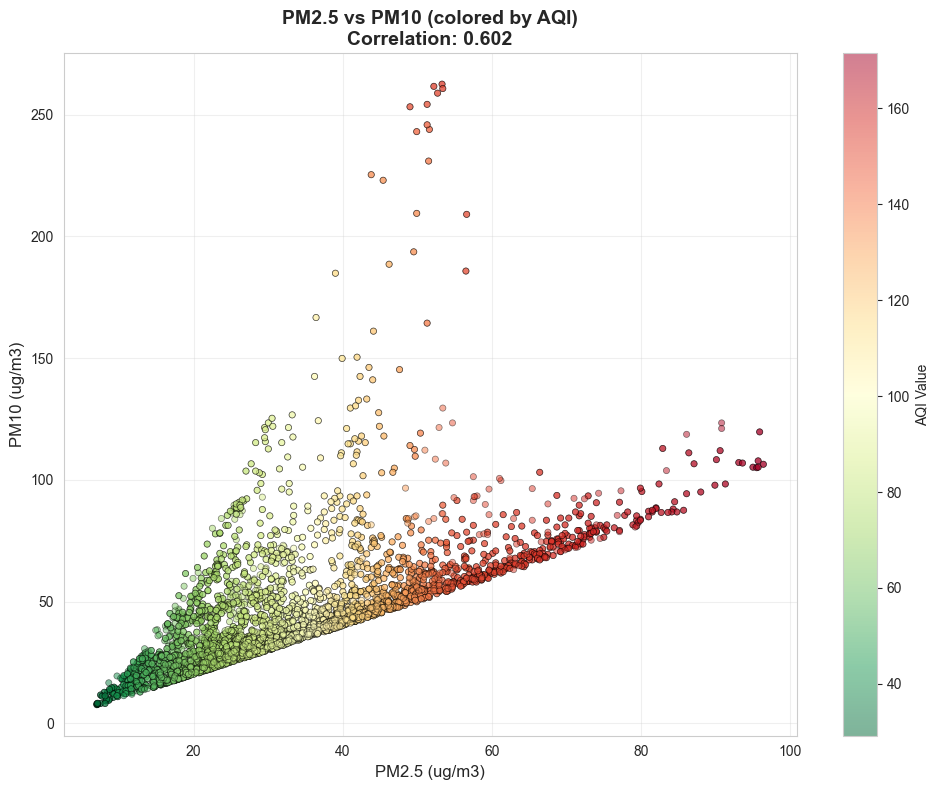

In [11]:
pm_corr = df[['pm2_5', 'pm10']].corr().iloc[0, 1]

print("Particulate Matter Analysis")
print("-" * 80)
print(f"PM2.5 vs PM10 correlation: {pm_corr:.3f}")

plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['pm2_5'], df['pm10'], c=df['aqi'], cmap='RdYlGn_r', 
                     alpha=0.5, s=20, edgecolors='black', linewidth=0.5)
plt.xlabel('PM2.5 (ug/m3)', fontsize=12)
plt.ylabel('PM10 (ug/m3)', fontsize=12)
plt.title(f'PM2.5 vs PM10 (colored by AQI)\nCorrelation: {pm_corr:.3f}', 
         fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='AQI Value')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('pm_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

Key Findings Summary

The analysis reveals important patterns in Karachi's air quality that inform 
predictions and public health decisions.

In [12]:
print("=" * 80)
print("EXPLORATORY DATA ANALYSIS SUMMARY")
print("=" * 80)

print(f"""
1. Dataset Overview:
   - Total records: {len(df):,}
   - Date range: {(df['timestamp'].max() - df['timestamp'].min()).days} days
   - Missing values: {df.isnull().sum().sum()}

2. AQI Statistics:
   - Average AQI: {df['aqi'].mean():.1f} ({get_aqi_category(df['aqi'].mean())})
   - Most common category: {category_counts.index[0]} ({category_counts.iloc[0]/len(df)*100:.1f}%)

3. Temporal Patterns:
   - Peak pollution hour: {hourly_avg.idxmax()}:00
   - Best air quality hour: {hourly_avg.idxmin()}:00
   - Worst day: {weekly_avg.idxmax()}
   - Best day: {weekly_avg.idxmin()}

4. Key Correlations with AQI:
   - Strongest: {aqi_corr.index[1]} ({aqi_corr.iloc[1]:.3f})
   - PM2.5 vs PM10: {pm_corr:.3f}
   - Temperature: {temp_corr:.3f}
   - Humidity: {humid_corr:.3f}
   - Wind Speed: {wind_corr:.3f}

5. Generated Visualizations:
   - aqi_overview.png
   - aqi_timeseries.html
   - daily_trends.png
   - temporal_patterns.png
   - pollutants.png
   - correlation.png
   - weather_impact.png
   - pm_analysis.png
""")

print("=" * 80)
print("Analysis Complete")
print("=" * 80)

EXPLORATORY DATA ANALYSIS SUMMARY

1. Dataset Overview:
   - Total records: 5,808
   - Date range: 133 days
   - Missing values: 0

2. AQI Statistics:
   - Average AQI: 98.6 (Moderate)
   - Most common category: Moderate (55.0%)

3. Temporal Patterns:
   - Peak pollution hour: 8:00
   - Best air quality hour: 16:00
   - Worst day: Saturday
   - Best day: Wednesday

4. Key Correlations with AQI:
   - Strongest: pm2_5 (0.980)
   - PM2.5 vs PM10: 0.602
   - Temperature: -0.394
   - Humidity: -0.075
   - Wind Speed: -0.330

5. Generated Visualizations:
   - aqi_overview.png
   - aqi_timeseries.html
   - daily_trends.png
   - temporal_patterns.png
   - pollutants.png
   - correlation.png
   - weather_impact.png
   - pm_analysis.png

Analysis Complete
